In [1]:
import os # directory
directory = 'D:/data science/COVID-19 Open Research Dataset Challenge (CORD-19)/document_parses'
folder_list = ['pdf_json', 'pmc_json']

In [2]:
%%time
# iterate all files and extract research paper title, abstract, and body_text
import json # read json file
import pandas as pd # dataframe
from tqdm import tqdm # progress bar
# create empty list
docs = []

for folder in folder_list: # iterate all folders
    for file in tqdm(os.listdir(f'{directory}/{folder}')): # iterate all files in each folder
        file_path = f'{directory}/{folder}/{file}' # generate file path
        try:
            j_file = json.load(open(file_path, 'rb')) # read each json file
            # get title from file
            title = j_file['metadata']['title'] 
            # get abstract from file
            try:
                abstract = j_file['abstract']
            except:
                abstract = ""
            # get body_text from file
            body_text = "" # create empty string

            for text in j_file["body_text"]:
                body_text += text['text']+' '

            docs.append([title, abstract, body_text])
        except:
            pass
# add column names to the dataframe
df = pd.DataFrame(docs, columns=['title', 'abstract', 'body_text'])
# save dataframe to a csv file
df.to_csv(f'D:/data science/COVID-19 Open Research Dataset Challenge (CORD-19)/document_parses/covid19_docs.csv', index = False)

100%|██████████| 109662/109662 [12:51<00:00, 142.13it/s]


Wall time: 32min 28s


  3%|▎         | 1154/38863 [00:00<00:06, 5791.20it/s]

Number of literatures contains "incubation" 38863


100%|██████████| 38863/38863 [00:06<00:00, 5784.76it/s]


The mean incubation time reported is 8.6 days
The median incubation time reported is 8.0 days
Number of incubation occurs in the literatures is 5316


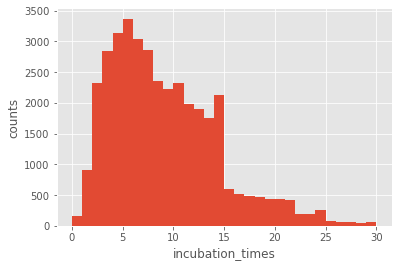

In [6]:
# find text with incubation and extract # of days in the same sentence
import re # regular expression
import numpy as np # basic stats
import matplotlib.pyplot as plt # basic plot
from matplotlib import style
style.use("ggplot")

# get paper contains incubation
incubation = df[df['body_text'].str.contains('incubation')]
print(f'Number of literatures contains "incubation" {len(incubation)}')

# get body_text content as texts
texts = incubation['body_text'].values
incubation_times = []
num_sentences = 0

for text in tqdm(texts): # iterate text contains 'incubation'
    for sentence in text.split(". "): # iterate sentence contains 'incubation'
        if "incubation" in sentence:               
            # find xx.xx to/- xx.xx day
            find_day = re.findall(r"(\d{1,2}(?:\.\d{1,2})?)? ?(?:to|-) ?(\d{1,2}(?:\.\d{1,2})?) day", sentence) 
            if len(find_day)==1: # find a match
                num_sentences += 1 # count how many 
                if find_day[0][0] == "":
                    single_day = float(find_day[0][1])
                    if single_day <= 30: # disgard unrealistic data
                        incubation_times.append(single_day)
                else:
                    # when time is given as range, add all possible values
                    start = int(float(find_day[0][0])) # start of a range
                    end = int(float(find_day[0][1])) # end of a range
                    if end <=30: # disgard unrealistic data
                        incubation_times += [*range(start, end+1)]

print(f'The mean incubation time reported is {round(np.mean(incubation_times),1)} days') # get mean incubation time
print(f'The median incubation time reported is {np.median(incubation_times)} days') # get median incubation time
print(f'Number of incubation occurs in the literatures is {num_sentences}') 
plt.hist(incubation_times, bins=30)
plt.ylabel('counts')
plt.xlabel('incubation_times')
plt.show()